In [1]:
#Importer les librairies
library(ggplot2)
library(dplyr)
library(FactoMineR)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



ERROR: Error in library(FactoMineR): there is no package called 'FactoMineR'


In [3]:
#Importer et afficher les données
ACP_nutritions=read.csv('Final_Nutrition_data.csv',header=TRUE, row.names=1)

In [4]:
#Sous ensmble ACP
ACP_nutritions_analyse = ACP_nutritions[0:6000, 1:15]
head(ACP_nutritions_analyse)

,energy_100g,fat_100g,saturated.fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin.a_100g,vitamin.c_100g,calcium_100g,iron_100g,nutrition_grade_fr
0,2243,28.570,1.25,0.0180,64.29,14.29,3.600,3.57,0.00000,0.000,0.000e+00,0,0.0000,0.00129,d
1,1941,17.860,0.00,0.0000,60.71,17.86,7.100,17.86,0.63500,0.250,0.000e+00,0,0.0710,0.00129,b
2,2540,8.035,5.36,0.0000,17.86,3.57,7.100,17.86,1.22428,0.482,2.400e-05,0,0.1430,0.00514,d
3,1833,18.750,4.69,0.0000,57.81,15.62,1.750,14.06,0.13970,0.055,0.000e+00,0,0.0620,0.00422,c
4,2230,36.670,5.00,0.0045,36.67,3.33,6.700,16.67,1.60782,0.633,0.000e+00,0,0.1330,0.00360,d
5,1824,18.180,1.82,0.0000,60.00,21.82,2.775,14.55,0.02286,0.009,5.625e-05,0,0.0125,0.00131,b


In [5]:
res.acp=PCA(ACP_nutritions_analyse, quali.sup=15, graph = FALSE)


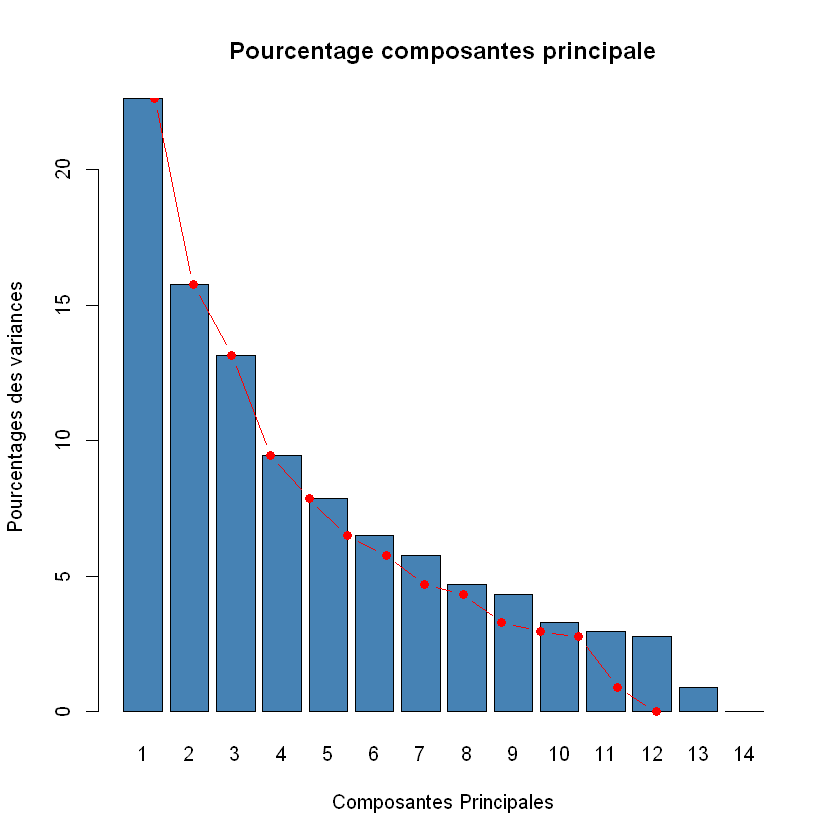

In [6]:
eig.val <- res.acp$eig # Retourner la valeur propre, la variance et la variance cumulée pour chaque dimension
barplot(eig.val[, 2], #le pourcentage de variance de chaque axe 
        names.arg = 1:nrow(eig.val), # Noms des axes
        main = "Pourcentage composantes principale",
        xlab = "Composantes Principales",
        ylab = "Pourcentages des variances",
        col  = "steelblue")
# liaison entre composantes
lines(x = 1:nrow(eig.val), eig.val[, 2], 
      type = "b", pch = 19, col = "red")

In [7]:
# Valeurs propres et pourcentage variance
res.acp$eig
  
# Résultats des variables
res.var <- res.acp$var
res.var$coord          # Coordonnées
res.var$contrib        # Contributions aux axes
res.var$cos2           # Qualité de représentation
# Résultats des individus
res.ind <- res.acp$ind
res.ind$coord          # Coordonnées
res.ind$contrib        # Contributions aux axes
res.ind$cos2           # Qualité de représentation

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.169411e+00,2.263865e+01,22.63865
comp 2,2.204777e+00,1.574841e+01,38.38706
comp 3,1.841734e+00,1.315524e+01,51.54230
comp 4,1.324697e+00,9.462119e+00,61.00442
comp 5,1.100006e+00,7.857189e+00,68.86161
comp 6,9.073296e-01,6.480926e+00,75.34254
comp 7,8.050319e-01,5.750228e+00,81.09276
comp 8,6.540692e-01,4.671923e+00,85.76469
comp 9,6.059248e-01,4.328035e+00,90.09272
comp 10,4.616900e-01,3.297786e+00,93.39051


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
energy_100g,0.8904354,-0.14635872,0.06283901,-0.12331900,-0.08399698
fat_100g,0.7309758,0.12038598,0.36662488,-0.01364676,-0.23818566
saturated.fat_100g,0.5610049,0.13573568,0.52031986,-0.08206543,-0.21759727
cholesterol_100g,0.0798229,0.12562895,0.63639478,0.05971570,0.21626212
carbohydrates_100g,0.4997327,-0.45579855,-0.29668483,-0.33226611,0.33688859
sugars_100g,0.3518393,-0.47223776,0.33495992,-0.45487712,0.30971338
fiber_100g,0.4443846,-0.30369405,-0.35508294,0.17023793,0.27006778
proteins_100g,0.5169125,0.19823361,-0.16388015,0.59023607,-0.18035004
salt_100g,0.3048055,0.86868346,-0.19048418,-0.19517509,0.25203884
sodium_100g,0.3048061,0.86868229,-0.19048621,-0.19517055,0.25204235


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
energy_100g,25.0164814,0.971566385,0.2144035,1.14800435,0.6414046
fat_100g,16.8588300,0.657335507,7.2982212,0.01405863,5.1574614
saturated.fat_100g,9.9301266,0.835647848,14.6998859,0.50839821,4.3043906
cholesterol_100g,0.2010372,0.715837929,21.9900584,0.26919101,4.2517302
carbohydrates_100g,7.8794684,9.422825375,4.7792951,8.33404142,10.3175688
sugars_100g,3.9058011,10.114785624,6.0919852,15.61966598,8.7201654
fiber_100g,6.2307359,4.183192228,6.8459352,2.18774265,6.6305619
proteins_100g,8.4305427,1.782337101,1.4582295,26.29874640,2.9569042
salt_100g,2.9313457,34.226174433,1.9701124,2.87562542,5.7748369
sodium_100g,2.9313570,34.226082384,1.9701542,2.87549178,5.7749979


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
energy_100g,0.792875172,0.0214208759,0.003948741,0.0152075753,0.007055492
fat_100g,0.534325652,0.0144927846,0.134413800,0.0001862341,0.056732407
saturated.fat_100g,0.314726549,0.0184241748,0.270732752,0.0067347341,0.047348573
cholesterol_100g,0.006371695,0.0157826327,0.404998317,0.0035659643,0.046769306
carbohydrates_100g,0.249732756,0.2077523226,0.088021888,0.1104007683,0.113493920
sugars_100g,0.123790899,0.2230085057,0.112198145,0.2069131936,0.095922380
fiber_100g,0.197477645,0.0922300761,0.126083895,0.0289809538,0.072936607
proteins_100g,0.267198567,0.0392965653,0.026856704,0.3483786153,0.032526137
salt_100g,0.092906398,0.7546109527,0.036284224,0.0380933139,0.063523577
sodium_100g,0.092906759,0.7546089232,0.036284994,0.0380915436,0.063525348


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0,1.1277399,-1.83680221,0.08638907,-0.7355182,-0.4378074
1,2.0591943,-1.20803651,-1.56317040,0.9811954,0.1716999
2,3.2029628,0.11613343,-1.77619599,2.9683406,0.4492913
3,1.9055647,-1.53384525,-0.94113164,1.1598396,-0.6783283
4,3.7566798,0.83408764,-1.14865844,1.9988955,0.1878302
5,0.9359054,-1.62571598,-0.36733063,0.2130374,-0.5094426
6,0.8840614,-1.24806701,-0.40433154,3.5155446,1.5612086
7,0.7559015,-1.44703359,-1.62710634,1.8698292,-0.3289084
8,1.3817701,-1.60684382,0.61447402,0.3428059,0.3765723
9,2.8208062,-1.20815767,0.89031885,0.8779225,0.7087535


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0,6.687874e-03,2.550403e-02,6.753665e-05,6.806427e-03,2.904155e-03
1,2.229794e-02,1.103174e-02,2.211233e-02,1.211277e-02,4.466769e-04
2,5.394782e-02,1.019527e-04,2.854984e-02,1.108561e-01,3.058507e-03
3,1.909491e-02,1.778472e-02,8.015353e-03,1.692498e-02,6.971614e-03
4,7.421275e-02,5.259051e-03,1.193998e-02,5.027042e-02,5.345450e-04
5,4.606108e-03,1.997898e-02,1.221058e-03,5.710105e-04,3.932276e-03
6,4.109935e-03,1.177497e-02,1.479439e-03,1.554954e-01,3.692967e-02
7,3.004696e-03,1.582855e-02,2.395818e-02,4.398820e-02,1.639093e-03
8,1.004019e-02,1.951782e-02,3.416874e-03,1.478525e-03,2.148574e-03
9,4.184241e-02,1.103396e-02,7.173202e-03,9.697163e-03,7.611039e-03


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
0,0.1267885481,0.3363464896,0.0007440116,5.393230e-02,0.019108575
1,0.2954805594,0.1016937789,0.1702734421,6.708806e-02,0.002054349
2,0.3744476974,0.0004922684,0.1151513817,3.215991e-01,0.007367893
3,0.3198806511,0.2072543451,0.0780263526,1.185049e-01,0.040534085
4,0.6347657800,0.0312916542,0.0593453873,1.797154e-01,0.001586850
5,0.1175793516,0.3547778510,0.0181126267,6.092267e-03,0.034838355
6,0.0188932672,0.0376546016,0.0039520051,2.987635e-01,0.058920184
7,0.0420741339,0.1541849443,0.1949470266,2.574475e-01,0.007965899
8,0.2247188279,0.3038891738,0.0444400912,1.383134e-02,0.016690318
9,0.4862185100,0.0891932949,0.0484368747,4.709745e-02,0.030695546


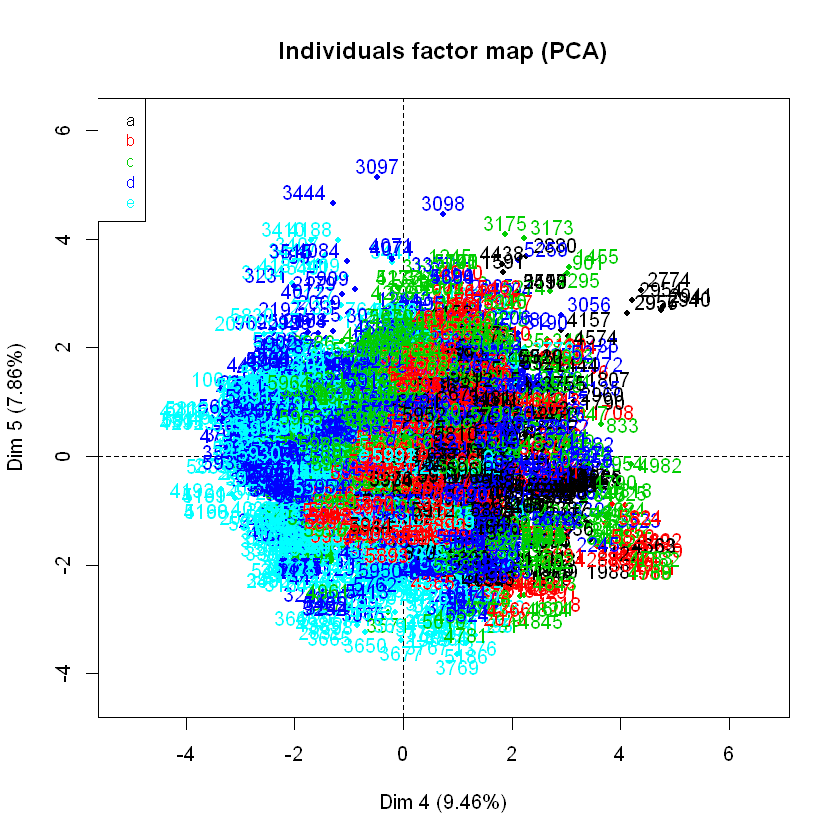

In [10]:
plot(res.acp, axes=c(4, 5), choix="ind",autoLab="yes", habillage=15)
#plot(res.acp,choix="ind",autoLab="yes",habillage=15) 

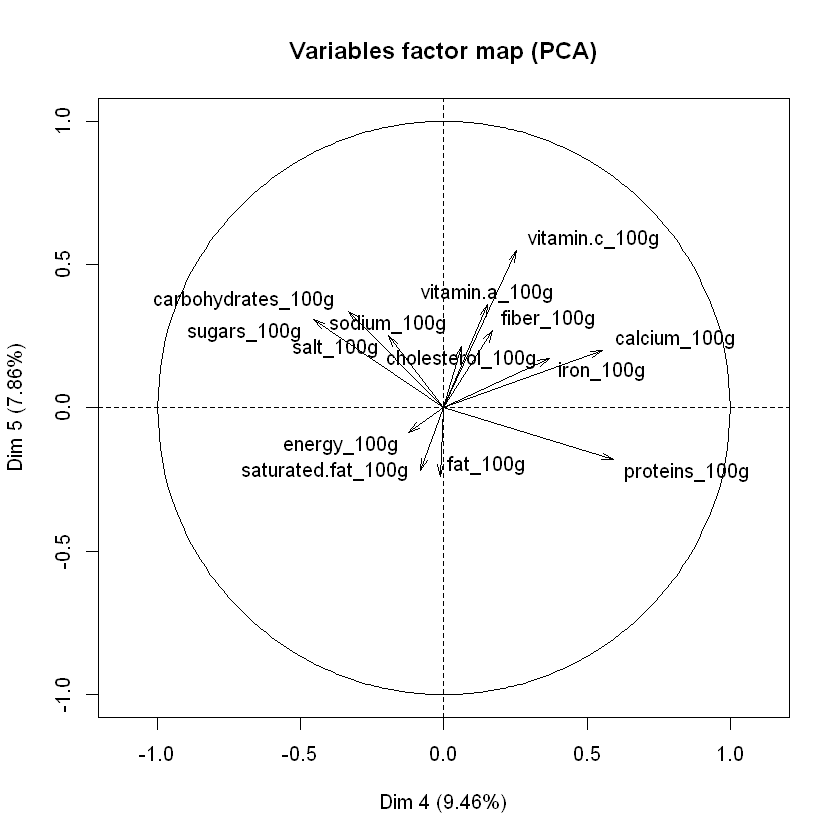

In [11]:
#plot(res.acp, choix = "var", autoLab = "yes")
plot(res.acp, axes=c(4, 5), choix="var",autoLab="yes")

In [11]:
#?plot.pca

In [12]:
#? PCA

In [13]:
#? plot.PCA